# FINAL PROJECT: Part 1- Regression Analysis


###  Table of Contents:

#### 1. Import libraries and files


#### 2. Data Cleaning
   - Drop columns that will not be used
   - Change data types as necessary
   - Check and correct missing values
   - Check and correct duplicates
   - Check and correct outliers
   

#### 3. Explore the data visually looking for relationships to test
   - Create heatmaps
   - After initial tests, add in features to account for categorical variables
   - Standardize the data to improve performance
   - Create scatter plots for several pairs of variables
    

#### 4. State a hypothesis and run a linear regression. 
   -  Observe results. 
    


### 1. Import libraries and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Paths to/from project folder

path_orig = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\02 Data\Original Data'
path_prep = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\02 Data\Prepared Data'
path_vis = r'C:\Users\kacor\CareerFoundry-Python\FINAL PROJECT\Project - Advanced Analytics & Dashboard Design\04 Analysis\Visualizations'

In [3]:
# Read in data
mls = pd.read_csv(os.path.join(path_prep, 'CRMLS_pop_inc.csv'), index_col=False)

In [4]:
mls.head()

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_date,price_per_sqft,sale_price,population,median_family_income
0,Los Angeles,Los Angeles,3,2.0,1575,63,8167,0,Y,N,2.5,45007,952.38,1500000,3862210,71505.72
1,Los Angeles,Los Angeles,3,2.0,2046,74,6328,1,Y,N,2.5,45072,1124.14,2300000,3862210,71505.72
2,Los Angeles,Los Angeles,3,2.0,1438,92,6748,1,Y,N,2.5,44978,579.28,833000,3862210,71505.72
3,Los Angeles,Los Angeles,3,2.0,1956,95,3051,10,Y,N,2.5,44819,969.95,1897220,3862210,71505.72
4,Los Angeles,Los Angeles,3,2.0,1350,71,10261,10,Y,N,2.5,44867,1367.41,1846000,3862210,71505.72


In [5]:
mls.sample(5)

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_date,price_per_sqft,sale_price,population,median_family_income
24374,Rowland Heights,Los Angeles,4,4.0,3442,31,9801,26,Y,N,2.000000,44901,384.08,1322000,51597,85374.96
25367,Lakewood,Los Angeles,3,1.0,1496,71,5752,31,Y,N,2.000000,44900,487.97,730000,80926,117031.20
51419,Ontario,San Bernardino,4,3.0,2208,1,3138,16,Y,N,0.020555,44904,330.50,729737,166892,73942.44
11743,Colton,San Bernardino,3,3.0,1406,23,4512,33,N,N,2.500000,44973,341.39,480000,53129,58882.56
4202,Downey,Los Angeles,3,2.0,2036,73,9296,42,Y,N,2.500000,44869,417.49,850000,113082,84726.84


### Data Cleaning

Most of the data cleaning was completed in Microsoft Excel using Power Query. A few remaining issues will be addressed here.

In [6]:
mls.shape

(51924, 16)

In [7]:
mls.columns

Index(['city', 'county', 'bedroom', 'bathrooms', 'property_sqft',
       'property_age', 'lot_sqft', 'dom', 'view', 'pool', 'commission',
       'sale_date', 'price_per_sqft', 'sale_price', 'population',
       'median_family_income'],
      dtype='object')

The 'sale_date' column will not be used in this analysis. 

In [8]:
mls.drop(columns=['sale_date'], inplace=True)

In [9]:
mls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51924 entries, 0 to 51923
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  51924 non-null  object 
 1   county                51924 non-null  object 
 2   bedroom               51924 non-null  int64  
 3   bathrooms             51905 non-null  float64
 4   property_sqft         51924 non-null  int64  
 5   property_age          51924 non-null  int64  
 6   lot_sqft              51924 non-null  int64  
 7   dom                   51924 non-null  int64  
 8   view                  51924 non-null  object 
 9   pool                  51924 non-null  object 
 10  commission            51924 non-null  float64
 11  price_per_sqft        51922 non-null  float64
 12  sale_price            51924 non-null  int64  
 13  population            51924 non-null  int64  
 14  median_family_income  51924 non-null  float64
dtypes: float64(4), int6

Convert sale_price column to float

In [10]:
mls['sale_price'] = mls['sale_price'].astype(float)

In [11]:
mls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51924 entries, 0 to 51923
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  51924 non-null  object 
 1   county                51924 non-null  object 
 2   bedroom               51924 non-null  int64  
 3   bathrooms             51905 non-null  float64
 4   property_sqft         51924 non-null  int64  
 5   property_age          51924 non-null  int64  
 6   lot_sqft              51924 non-null  int64  
 7   dom                   51924 non-null  int64  
 8   view                  51924 non-null  object 
 9   pool                  51924 non-null  object 
 10  commission            51924 non-null  float64
 11  price_per_sqft        51922 non-null  float64
 12  sale_price            51924 non-null  float64
 13  population            51924 non-null  int64  
 14  median_family_income  51924 non-null  float64
dtypes: float64(5), int6

Check for missing values

In [12]:
mls.isnull().sum()

city                     0
county                   0
bedroom                  0
bathrooms               19
property_sqft            0
property_age             0
lot_sqft                 0
dom                      0
view                     0
pool                     0
commission               0
price_per_sqft           2
sale_price               0
population               0
median_family_income     0
dtype: int64

The number of missing values represents an extremely small percentage of the data.
The missing values will be dropped

In [13]:
mls = mls.dropna()

In [14]:
mls.shape

(51903, 15)

Check for duplicates

In [15]:
dups = mls.duplicated()

In [16]:
dups.shape # No dups

(51903,)

Check for extreme values

In [17]:
mls.describe()

,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,price_per_sqft,sale_price,population,median_family_income
count,51903.000000,51903.000000,51903.000000,51903.000000,5.190300e+04,51903.000000,5.190300e+04,51903.000000,5.190300e+04,5.190300e+04,51903.000000
mean,3.461149,2.553513,2004.162900,47.530104,9.393330e+04,38.803614,2.267702e+00,500.004473,1.012919e+06,3.801975e+05,95668.920941
std,0.946015,1.082696,1019.770519,28.989333,4.918508e+06,46.470139,1.025956e+00,306.947373,1.290168e+06,9.742540e+05,32939.400514
min,0.000000,0.000000,322.000000,0.000000,0.000000e+00,0.000000,8.888890e-09,5.600000,1.000000e+04,2.080000e+02,30994.920000
25%,3.000000,2.000000,1355.000000,24.000000,5.751000e+03,8.000000,2.000000e+00,296.930000,5.380000e+05,4.995300e+04,72132.720000
50%,3.000000,2.000000,1778.000000,46.000000,7.260000e+03,22.000000,2.500000e+00,431.580000,7.250000e+05,8.440000e+04,85048.920000
75%,4.000000,3.000000,2400.000000,68.000000,9.583000e+03,53.000000,2.500000e+00,612.705000,1.080000e+06,1.668920e+05,114540.360000
max,22.000000,20.000000,31608.000000,2023.000000,5.331744e+08,1593.000000,2.120000e+02,9347.540000,1.000000e+08,3.862210e+06,299970.000000


In [18]:
# First, drop the price_per_sqft column. It will be recreated after outliers are corrected/removed

mls = mls.drop(columns='price_per_sqft')

In [19]:
mls.head(1)

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
0,Los Angeles,Los Angeles,3,2.0,1575,63,8167,0,Y,N,2.5,1500000.0,3862210,71505.72


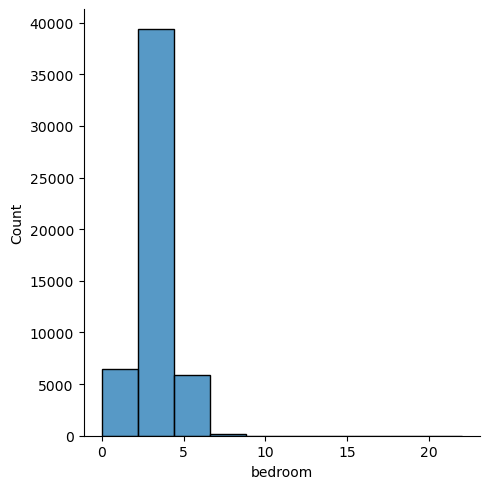

In [20]:
# Check for extreme values in bedroom column

sns.displot(mls['bedroom'], bins=10)

In [21]:
# How many values in the bedroom column above 8

mls[mls['bedroom'] >= 8]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
9896,Ontario,San Bernardino,8,3.0,2574,101,12100,10,N,Y,2.500000,820000.0,166892,73942.44
9897,Los Angeles,Los Angeles,9,3.0,2284,119,6210,106,N,N,2.500000,1526500.0,3862210,71505.72
9900,Desert Hot Springs,Riverside,9,3.0,3307,18,16553,257,N,N,2.500000,575000.0,27678,46002.00
19099,Temecula,Riverside,8,4.0,4200,23,7405,54,Y,N,2.500000,910000.0,104955,114540.36
19105,La Quinta,Riverside,8,4.0,3633,22,9583,81,Y,Y,2.500000,975000.0,38774,106224.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47576,San Marino,Los Angeles,8,9.0,7607,9,33673,2,Y,Y,2.250000,9600000.0,13294,203346.00
47648,Murrieta,Riverside,8,5.0,5468,39,574121,73,Y,N,2.250000,2750000.0,106326,105594.72
50170,Garden Grove,Orange,8,4.0,2450,1,7500,32,Y,N,1.750000,1250000.0,173853,82581.84
50221,Oak Hills,San Bernardino,9,6.0,5477,2023,93366,127,Y,N,1.500000,955000.0,10308,109508.52


In [22]:
# Remove records with values in the bedroom column above 8

mls = mls[mls['bedroom'] < 8]

In [23]:
mls['bedroom'].describe()

count    51832.000000
mean         3.453214
std          0.917026
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bedroom, dtype: float64

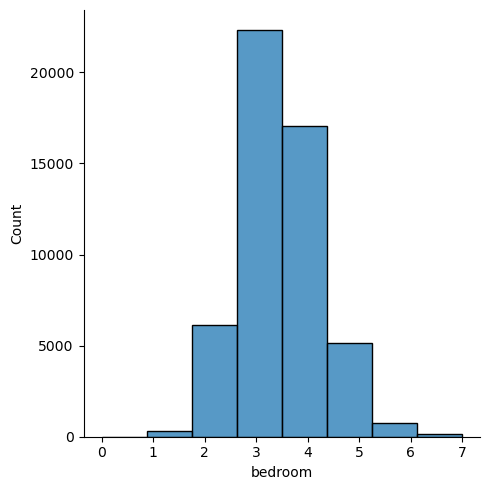

In [24]:
# Check the distribution of values in bedroom column again

sns.displot(mls['bedroom'], bins=8)

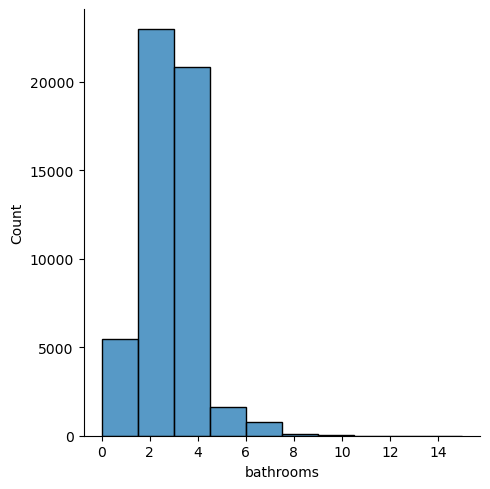

In [25]:
# Check for extreme values in bathrooms column

sns.displot(mls['bathrooms'], bins=10)

In [26]:
# Remove records with values in the bathrooms column above 8

mls = mls[mls['bathrooms'] < 8]

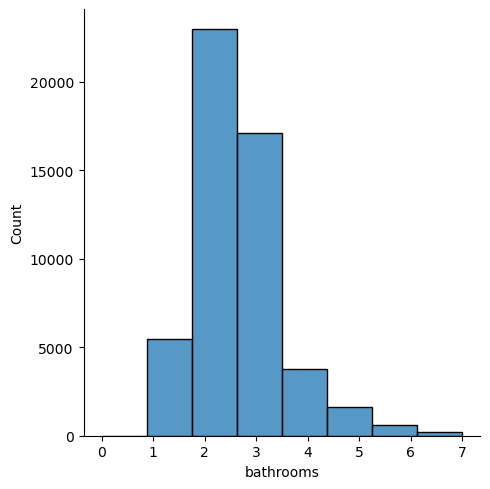

In [27]:
# Check distribution of bathrooms column again

sns.displot(mls['bathrooms'], bins=8)

In [28]:
mls['bathrooms'].describe()

count    51687.000000
mean         2.529263
std          1.005821
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: bathrooms, dtype: float64

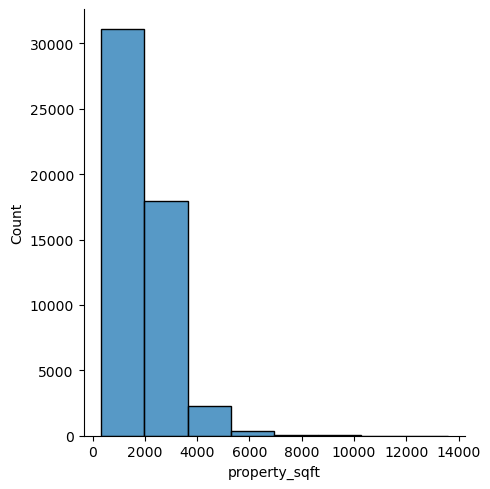

In [29]:
# Check the distribution of values in property_sqft column

sns.displot(mls['property_sqft'], bins=8)

In [30]:
# How many values in the property_sqft column above 6000

mls[mls['property_sqft'] >= 6000]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
10794,Ontario,San Bernardino,5,3.0,6006,110,17169,57,Y,N,2.500000,1020000.0,166892,73942.44
11092,Redlands,San Bernardino,3,3.0,6610,15,206910,12,Y,Y,2.500000,1180000.0,69787,112838.88
19314,Glendora,Los Angeles,3,4.0,6998,21,830515,29,Y,N,2.500000,3250000.0,50855,109508.52
20262,Palm Desert,Riverside,4,4.0,8902,16,106772,0,Y,Y,2.500000,13500000.0,49953,90938.76
20269,Pasadena,Los Angeles,4,4.0,9218,107,36792,0,Y,Y,2.500000,6100000.0,139065,116952.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47593,San Juan Capistrano,Orange,5,6.0,6064,32,10500,6,Y,N,2.250000,3386951.0,35562,108766.68
47740,Murrieta,Riverside,4,4.0,6088,7,32670,100,Y,Y,2.250000,2530000.0,106326,105594.72
50724,San Dimas,Los Angeles,5,6.0,6261,0,22216,236,N,N,0.025597,2930000.0,33896,121624.80
50729,Thermal,Riverside,3,5.0,7192,4,7405,3,Y,N,1.000000,4000000.0,3570,30994.92


In [31]:
# Remove records with values in the property_sqft column above 6000 (219 records)

mls = mls[mls['property_sqft'] < 6000]

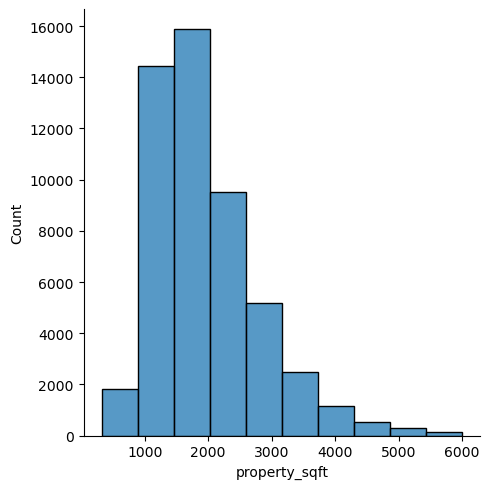

In [32]:
# Check the distribution of values in property_sqft column again

sns.displot(mls['property_sqft'], bins=10)

In [33]:
mls['property_sqft'].describe()

count    51468.000000
mean      1956.761697
std        839.874836
min        322.000000
25%       1351.000000
50%       1770.000000
75%       2378.000000
max       5998.000000
Name: property_sqft, dtype: float64

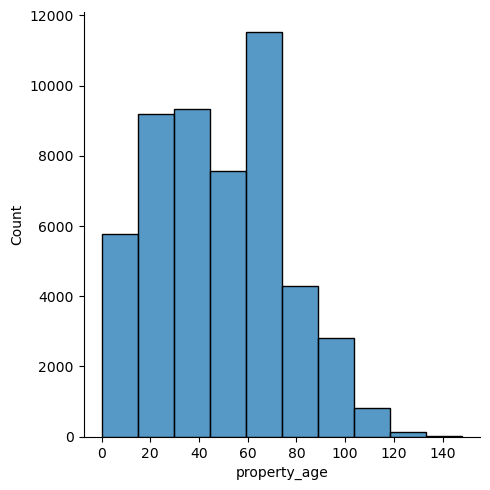

In [34]:
# Check the distribution of values in property_age column

sns.displot(mls['property_age'], bins=10)

In [35]:
# Also remove any record with a property_age value above 150, which is unusual for this area

mls = mls[mls['property_age'] < 150]

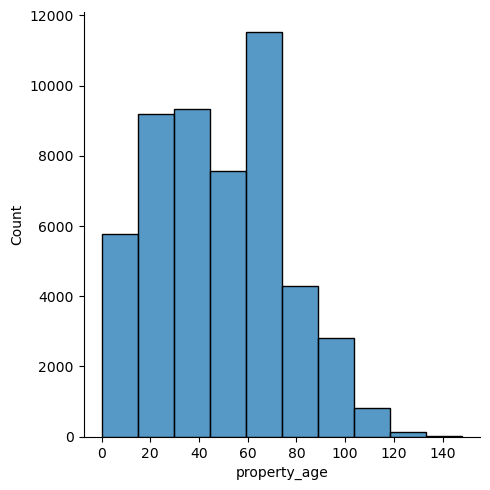

In [36]:
# Re-check the distribution of values in property_age column

sns.displot(mls['property_age'], bins=10)

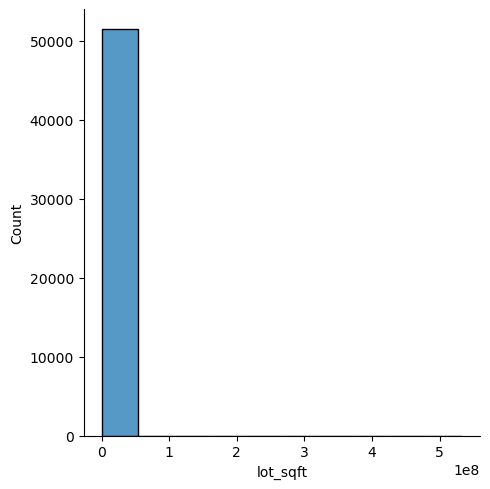

In [37]:
# Check the distribution of values in lot_sqft column

sns.displot(mls['lot_sqft'], bins=10)

In [38]:
# How many values in the lot_sqft column are 87120 (2 acres)

mls[mls['lot_sqft'] > 87120]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
623,Murrieta,Riverside,3,2.0,1620,21,358499,0,N,N,2.5,810000.0,106326,105594.72
908,Lancaster,Los Angeles,3,2.0,1554,68,111094,12,N,N,2.5,410000.0,159092,72590.76
1086,Lancaster,Los Angeles,3,2.0,1373,69,109030,15,N,N,2.5,420000.0,159092,72590.76
1112,Acton,Los Angeles,3,2.0,1248,33,6971059,152,N,N,2.5,375000.0,6956,131271.36
1116,Palmdale,Los Angeles,3,2.0,1519,78,196703,158,N,N,2.5,940000.0,155810,74383.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51401,Oak Hills,San Bernardino,4,3.0,2271,1,108900,130,Y,N,2.3,620000.0,10308,109508.52
51410,Oak Hills,San Bernardino,4,3.0,2271,1,100188,148,Y,N,2.3,620000.0,10308,109508.52
51421,Homeland,Riverside,4,3.0,3257,1,169884,17,Y,N,1.5,768000.0,5921,58960.44
51429,Oak Hills,San Bernardino,4,3.0,2271,1,108900,181,Y,N,2.3,620000.0,10308,109508.52


Many of these lot sizes are accurate, legitimate outliers, but many are incorrect data entries caused by the MLS system. All will be removed.

In [39]:
# Remove records with lot size > 87120

mls = mls[mls['lot_sqft'] <= 87120]

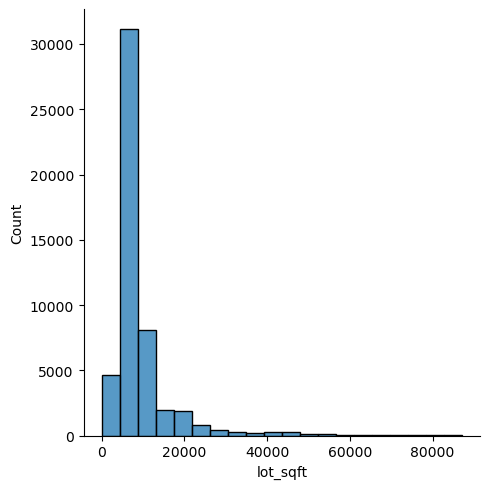

In [40]:
# Re-check the distribution of values in lot_sqft column

sns.displot(mls['lot_sqft'], bins=20)

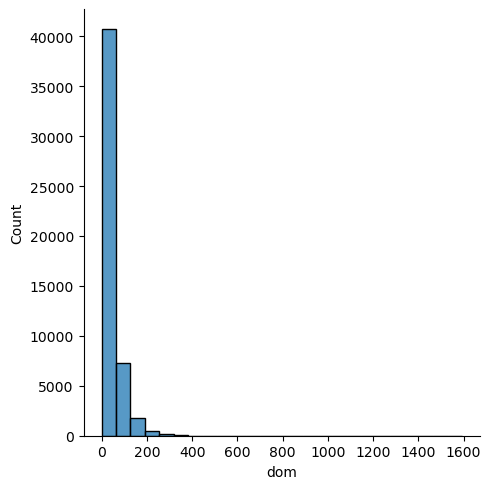

In [41]:
# Check the distribution of values in dom column

sns.displot(mls['dom'], bins=25)

In [42]:
# How many values in the dom column are above 400 days

mls[mls['dom'] > 365]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
1946,Long Beach,Los Angeles,3,2.0,1786,66,5627,477,N,N,2.5,760000.0,468594,78817.20
4025,Lake Arrowhead,San Bernardino,3,2.0,1838,39,13193,377,Y,N,2.5,625000.0,11255,96538.20
9105,Hemet,Riverside,2,2.0,904,46,3485,479,N,N,2.5,321000.0,81203,55207.68
17098,Baldwin Park,Los Angeles,2,1.0,939,68,9983,376,N,N,2.5,535000.0,76411,68110.68
17134,Compton,Los Angeles,2,1.0,504,84,2237,487,N,N,2.5,370000.0,97663,60557.64
18527,Hemet,Riverside,3,1.0,1122,65,43996,421,Y,N,2.5,645000.0,81203,55207.68
19344,Indian Wells,Riverside,3,4.0,2628,1,11761,371,Y,Y,2.5,2295000.0,5089,142560.00
20417,Corona,Riverside,4,4.0,3821,26,80586,496,Y,Y,2.5,2400000.0,157395,109041.24
21251,La Quinta,Riverside,4,5.0,4800,9,18731,378,Y,N,2.5,4000000.0,38774,106224.36
21277,Lake Arrowhead,San Bernardino,4,5.0,3100,47,11390,442,Y,N,2.5,2475000.0,11255,96538.20


In [43]:
# Remove values in the dom column above 366 days

mls = mls[mls['dom'] < 366]

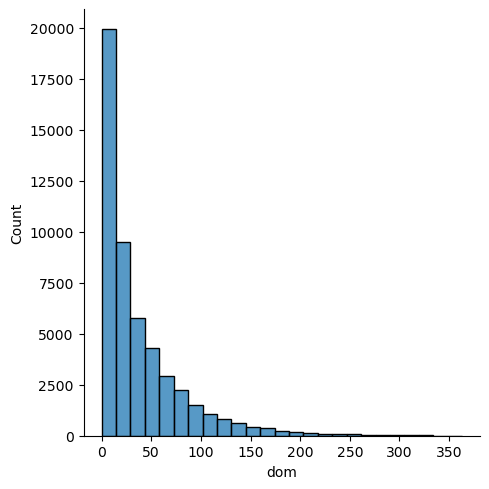

In [44]:
# Re-check the distribution of values in dom column

sns.displot(mls['dom'], bins=25)

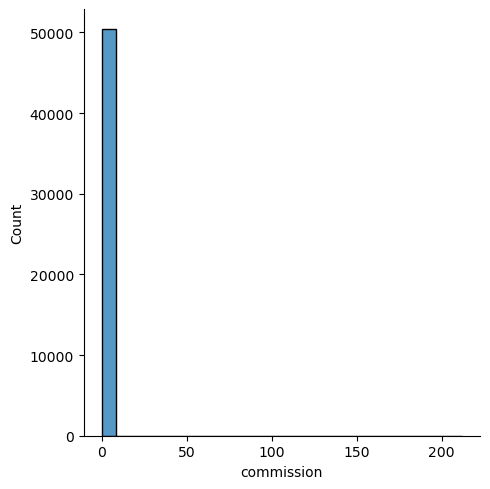

In [45]:
# Check the distribution of values in commission column

sns.displot(mls['commission'], bins=25)

In [46]:
# How many values in the commission column above 6

mls[mls['commission'] > 6]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
50651,Palm Springs,Riverside,3,4.0,1964,63,9148,1,Y,Y,33.0,2200000.0,45827,73022.40
51142,La Quinta,Riverside,2,2.0,1693,16,6534,0,N,N,212.0,581650.0,38774,106224.36
51368,La Quinta,Riverside,3,2.0,1700,26,7405,9,Y,N,25.0,625000.0,38774,106224.36


In [47]:
# Any commission above 6% is unusual. Those will be removed

mls = mls[mls['commission'] <= 6]

In [48]:
# How many values in the commission column below 1

mls[mls['commission'] < 1]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
50540,San Bernardino,San Bernardino,2,1.0,1008,84,7250,0,Y,N,0.001818,275000.0,213044,53202.60
50542,Corona,Riverside,3,1.0,1344,84,7405,0,N,N,0.000002,519000.0,157395,109041.24
50543,Lake Arrowhead,San Bernardino,2,1.0,864,42,3654,0,Y,N,0.031250,160000.0,11255,96538.20
50544,Los Angeles,Los Angeles,1,1.0,520,101,1610,0,N,N,0.000002,420000.0,3862210,71505.72
50547,Downey,Los Angeles,4,1.0,1230,73,6250,0,N,N,0.750000,685000.0,113082,84726.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51918,San Juan Capistrano,Orange,4,5.0,3408,1,6808,56,Y,N,0.011266,2218990.0,35562,108766.68
51919,Chino,San Bernardino,5,5.0,3346,1,4993,61,N,N,0.027755,1080888.0,80810,103392.96
51921,Irvine,Orange,4,5.0,3105,1,4000,77,Y,N,0.042373,2360000.0,229850,145141.92
51922,Riverside,Riverside,5,5.0,3676,1,72070,9,Y,N,0.008074,1238542.0,313041,83711.76


In [49]:
# Any commission below 1% is unusual. They will be removed

mls = mls[mls['commission'] >= 1]

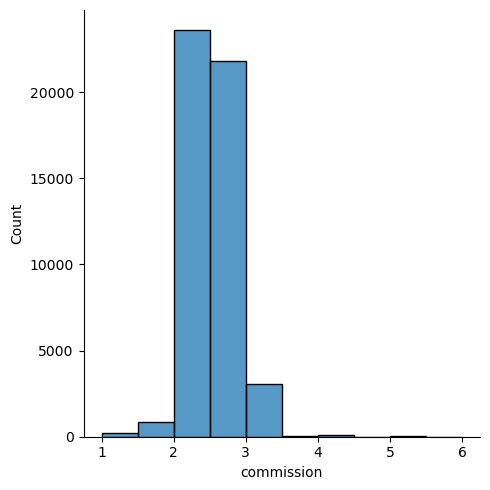

In [50]:
# Re-check the distribution of values in commission column

sns.displot(mls['commission'], bins=10)

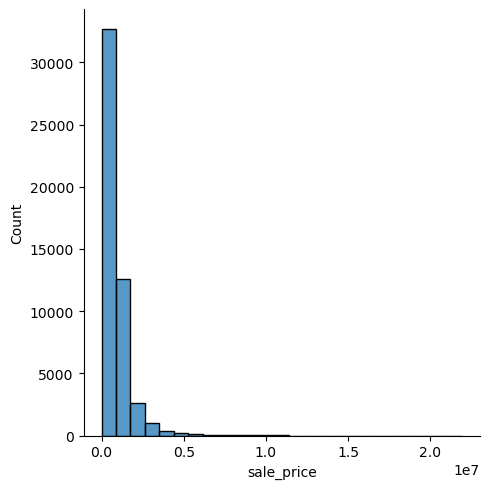

In [51]:
# Check the distribution of values in sale_price column

sns.displot(mls['sale_price'], bins=25)

In [52]:
# How many values in the sale_price column above $7,500,000

mls[mls['sale_price'] > 7500000]

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income
9690,Los Angeles,Los Angeles,2,2.0,2746,112,24647,25,N,N,2.50,9600000.0,3862210,71505.72
10161,Manhattan Beach,Los Angeles,2,3.0,3635,43,3328,9,Y,N,2.50,15573900.0,35534,234342.24
12039,Dana Point,Orange,3,3.0,3339,5,11400,0,Y,N,2.50,8150000.0,33861,136563.24
13456,Los Angeles,Los Angeles,3,3.0,2596,62,9601,56,Y,Y,2.50,12500000.0,3862210,71505.72
15897,Malibu,Los Angeles,4,3.0,2400,57,3743,48,Y,N,2.50,7945000.0,12830,223398.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33546,Dana Point,Orange,4,3.0,4343,47,8589,56,Y,N,2.00,9400000.0,33861,136563.24
47588,Newport Beach,Orange,4,7.0,3939,0,4000,4,Y,N,2.25,9195000.0,84792,154482.00
47591,Los Angeles,Los Angeles,5,7.0,5582,99,75596,45,Y,N,2.25,10294015.0,3862210,71505.72
47635,Beverly Hills,Los Angeles,4,5.0,5800,60,19992,55,Y,N,2.25,12400000.0,34536,163199.52


In [53]:
# Remove records with a sale price above $7,500,000

mls = mls[mls['sale_price'] <= 7500000]

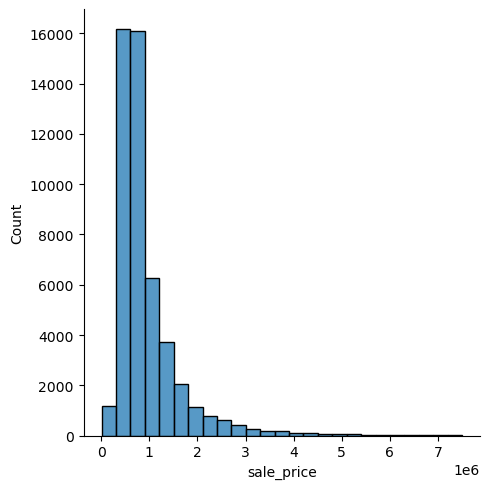

In [54]:
# Re-check the distribution of values in sale_price column

sns.displot(mls['sale_price'], bins=25)

In [55]:
# Recreate the price_per_sqft column with newly cleaned sale_price and property_sqft data 

mls['price_per_sqft'] = mls['sale_price'] / mls['property_sqft']

In [56]:
mls.head(5)

,city,county,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,view,pool,commission,sale_price,population,median_family_income,price_per_sqft
0,Los Angeles,Los Angeles,3,2.0,1575,63,8167,0,Y,N,2.5,1500000.0,3862210,71505.72,952.380952
1,Los Angeles,Los Angeles,3,2.0,2046,74,6328,1,Y,N,2.5,2300000.0,3862210,71505.72,1124.144673
2,Los Angeles,Los Angeles,3,2.0,1438,92,6748,1,Y,N,2.5,833000.0,3862210,71505.72,579.276773
3,Los Angeles,Los Angeles,3,2.0,1956,95,3051,10,Y,N,2.5,1897220.0,3862210,71505.72,969.948875
4,Los Angeles,Los Angeles,3,2.0,1350,71,10261,10,Y,N,2.5,1846000.0,3862210,71505.72,1367.407407


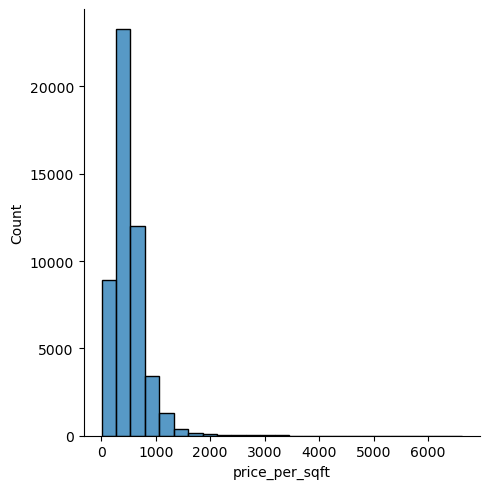

In [57]:
# check the distribution of values in price_per_sqft column

sns.displot(mls['price_per_sqft'], bins=25)

In [58]:
mls['price_per_sqft'].describe()

count    49626.000000
mean       496.531171
std        276.781440
min          5.599104
25%        299.437639
50%        434.872226
75%        612.988813
max       6625.000000
Name: price_per_sqft, dtype: float64

### 3. Explore data visually looking for variables to test further.

C:\Users\kacor\AppData\Local\Temp\ipykernel_32396\105275061.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mls.corr(), annot=True, cmap='YlGnBu')


<Axes: >

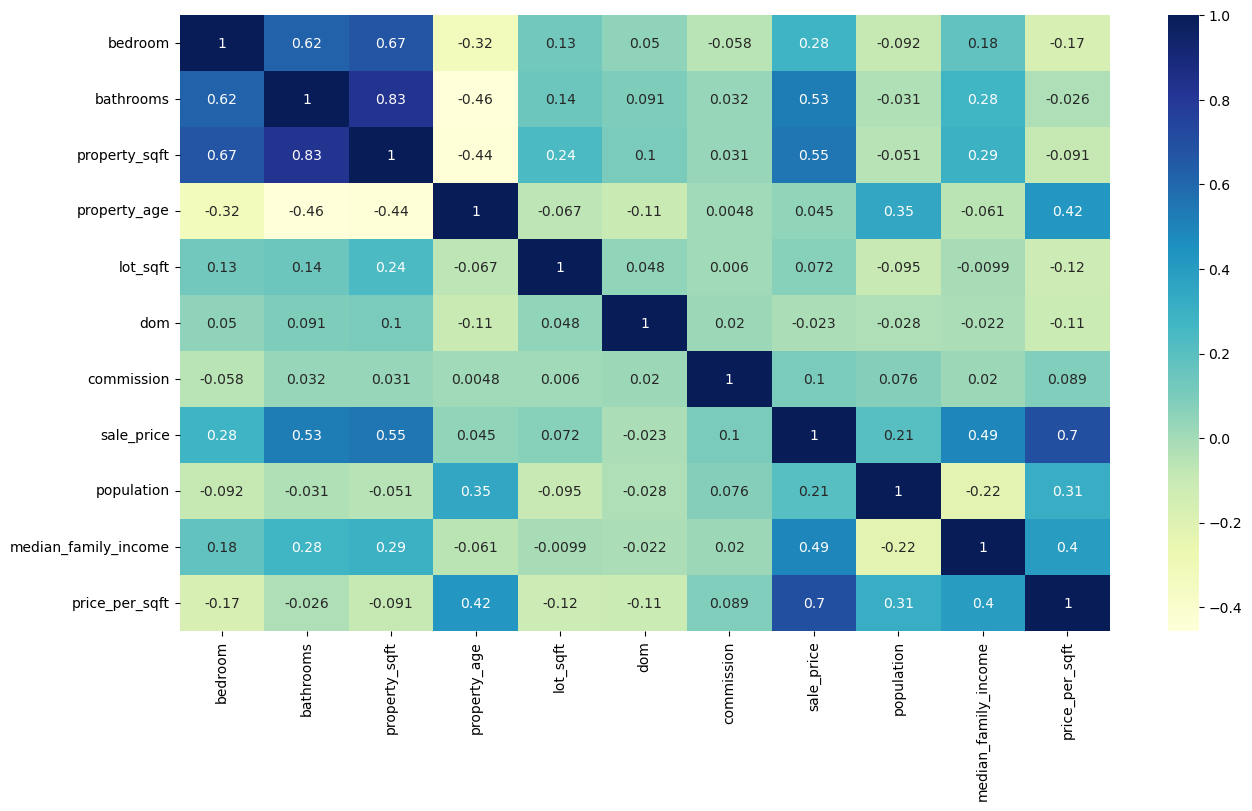

In [59]:
# Create heatmap

plt.figure(figsize=(15,8))
sns.heatmap(mls.corr(), annot=True, cmap='YlGnBu')

A few interesting points of note:
- There appears to be no meaningful correlation between commission and sale price or dom (days on market). Also, I expected a negative correlation between commission and dom, but it is very slightly positive
- Sale price is most correlated with property sqft, bathrooms, and bedrooms, but has very little correlation with property age or lot sqft

In [60]:
mls.shape

(49626, 15)

In [61]:
# Save cleaned df to new csv file, with 'city' & 'county' included (to be used in Tableau)

mls.to_csv(os.path.join(path_prep, 'CRMLS_cln.csv'), index=False)

In [62]:
# Drop the 'city' column as it will no longer be needed

mls.drop(columns=['city'], inplace=True)

#### Add in features to take into account the effect of the categorical variables.

In [63]:
# Create one hot encoding for the 'view', 'pool', and 'county' variables
# This will also delete the original categorical variables

mls2 = pd.get_dummies(mls, prefix=['county', 'view', 'pool'], drop_first=True)
mls2.sample(5)

,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,sale_price,population,median_family_income,price_per_sqft,county_Orange,county_Riverside,county_San Bernardino,view_Y,pool_Y
29115,3,3.0,1503,36,8712,20,2.0,640000.0,313041,83711.76,425.815037,0,1,0,0,0
10162,2,3.0,1382,86,4857,9,2.5,1635000.0,3862210,71505.72,1183.068017,0,0,0,0,0
12917,3,3.0,2045,32,7200,6,2.5,1365000.0,48758,159539.16,667.481663,1,0,0,1,0
42976,3,2.0,1749,52,70567,48,2.0,700000.0,313041,83711.76,400.228702,0,1,0,1,0
5691,3,2.0,1478,44,7841,29,2.5,900000.0,52550,62685.48,608.930988,0,1,0,1,1


In [64]:
mls2.shape

(49626, 16)

In [65]:
# Save cleaned and features added df to new csv file

mls2.to_csv(os.path.join(path_prep, 'CRMLS_cln_dum.csv'), index=False)

In [66]:
mls2.columns

Index(['bedroom', 'bathrooms', 'property_sqft', 'property_age', 'lot_sqft',
       'dom', 'commission', 'sale_price', 'population', 'median_family_income',
       'price_per_sqft', 'county_Orange', 'county_Riverside',
       'county_San Bernardino', 'view_Y', 'pool_Y'],
      dtype='object')

#### Standardize the data to improve performance of the model

In [67]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
mls2_std = scaler.fit_transform(mls2)
mls2_std

array([[-0.48605414, -0.51674356, -0.44095873, ..., -0.45845788,
         0.83912516, -0.45226519],
       [-0.48605414, -0.51674356,  0.13011225, ..., -0.45845788,
         0.83912516, -0.45226519],
       [-0.48605414, -0.51674356, -0.60706642, ..., -0.45845788,
         0.83912516, -0.45226519],
       ...,
       [ 0.63220839,  2.5943753 ,  1.29044117, ..., -0.45845788,
        -1.19171733, -0.45226519],
       [ 1.75047093,  3.63141492,  2.20221479, ..., -0.45845788,
         0.83912516,  2.21109214],
       [ 0.63220839,  2.5943753 ,  1.13645813, ..., -0.45845788,
        -1.19171733, -0.45226519]])

In [68]:
# Convert array back to df

mls2_std_df = pd.DataFrame(mls2_std, columns = ['bedroom', 'bathrooms', 'property_sqft', 'property_age', 'lot_sqft',
       'dom', 'commission', 'sale_price', 'population', 'median_family_income',
       'price_per_sqft', 'county_Orange', 'county_Riverside',
       'county_San Bernardino', 'view_Y', 'pool_Y'])

In [69]:
# Confirm new df

mls2_std_df.sample(5)

,bedroom,bathrooms,property_sqft,property_age,lot_sqft,dom,commission,sale_price,population,median_family_income,price_per_sqft,county_Orange,county_Riverside,county_San Bernardino,view_Y,pool_Y
39456,-0.486054,-0.516744,-0.592517,0.757084,-0.272278,0.713221,-0.858673,0.024690,-0.054276,-0.882593,0.597838,2.187679,-0.651489,-0.458458,-1.191717,-0.452265
17346,-1.604317,-1.553783,-1.082353,1.048972,-0.495471,-0.342362,0.622983,-0.489968,0.086152,-0.510342,0.226687,-0.457105,-0.651489,-0.458458,-1.191717,-0.452265
7573,0.632208,-0.516744,-0.335474,-0.082094,-0.509443,0.502105,0.622983,0.148378,-0.356656,0.407202,0.488613,2.187679,-0.651489,-0.458458,-1.191717,-0.452265
610,-0.486054,-0.516744,-0.648290,1.194915,-0.392269,-0.670766,0.622983,0.765446,3.556376,-0.734340,2.064786,-0.457105,-0.651489,-0.458458,-1.191717,-0.452265
30258,0.632208,0.520296,1.087960,-0.301010,-0.103092,2.261410,-0.858673,0.464119,-0.340259,-0.309436,-0.163276,-0.457105,-0.651489,-0.458458,-1.191717,-0.452265


In [70]:
# Save cleaned, feature added and standardized df to new csv file

mls2_std_df.to_csv(os.path.join(path_prep, 'CRMLS_cln_std.csv'), index=False)

<Axes: >

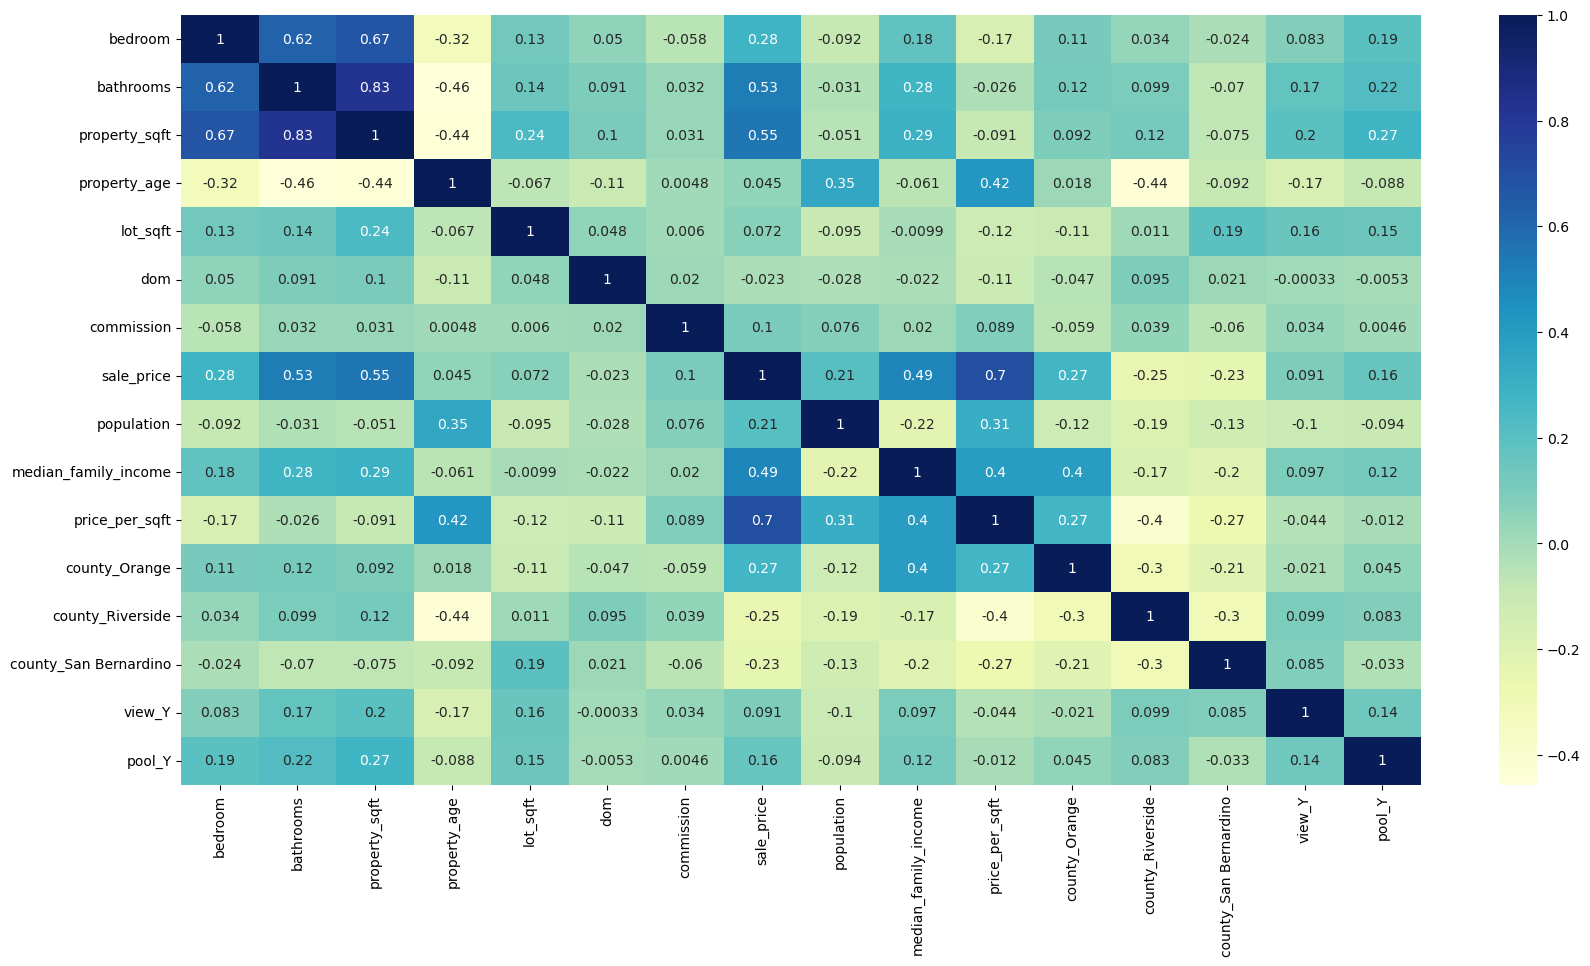

In [71]:
# Generate another heatmap, this time including categorical variables

plt.figure(figsize=(20,10))
sns.heatmap(mls2_std_df.corr(), annot=True, cmap='YlGnBu')

Observations
- Sale Price shows a small amount of correlation with San Bernardino, Riverside (negative). Also shows correlation with Orange, view yes, and pool yes (positive)

#### Investigate the relationships of several pairs of variables

Text(0, 0.5, 'price_per_sqft')

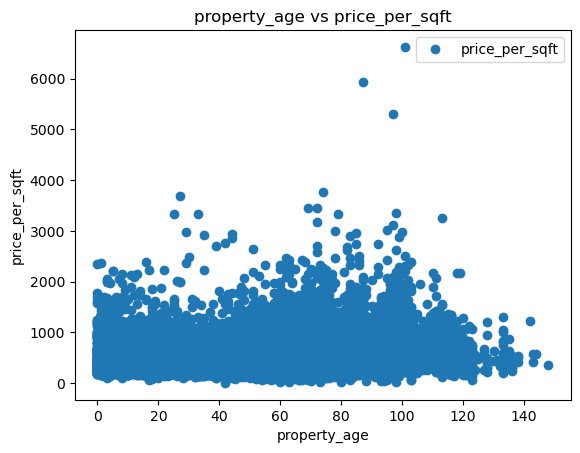

In [72]:
# Create a scatterplot of Median Household Income vs. price_per_sqft


mls2.plot(x = 'property_age', y='price_per_sqft',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('property_age vs price_per_sqft')  
plt.xlabel('property_age')  
plt.ylabel('price_per_sqft')  

The Minimum Household Income will not be used at this time.

Text(0, 0.5, 'sale_price')

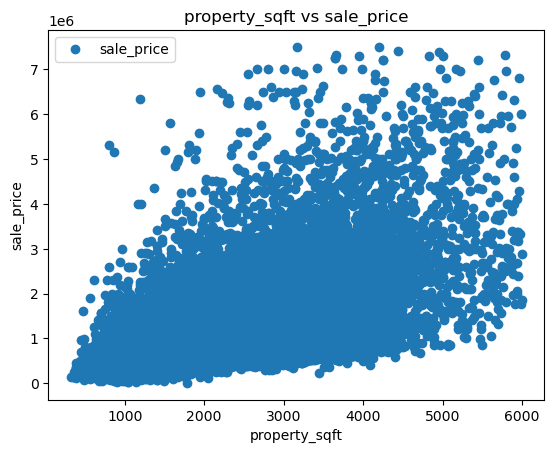

In [73]:
# Create a scatterplot of property_sqft vs. sale_price

mls2.plot(x = 'property_sqft', y='sale_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('property_sqft vs sale_price')  
plt.xlabel('property_sqft')  
plt.ylabel('sale_price')  

Text(0, 0.5, 'sale_price')

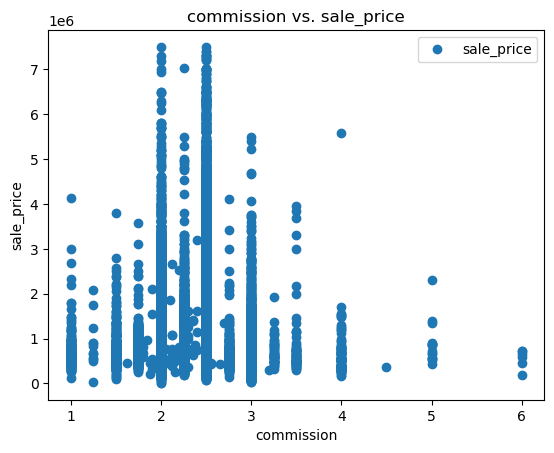

In [74]:
# Create a scatterplot of commission vs. sale_price

mls2.plot(x = 'commission', y='sale_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('commission vs. sale_price')  
plt.xlabel('commission')  
plt.ylabel('sale_price') 

Text(0, 0.5, 'dom')

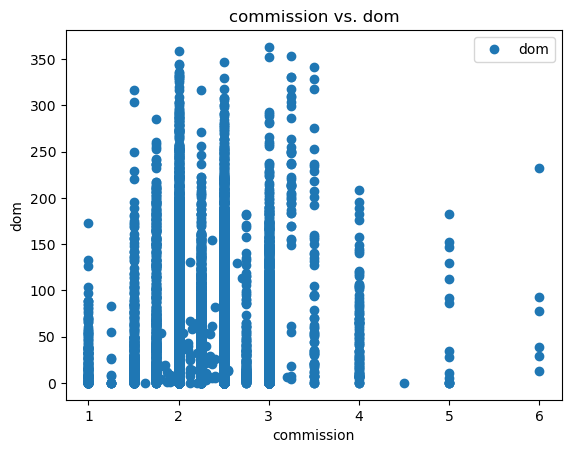

In [75]:
# Create a scatterplot of commission vs. dom

mls2.plot(x = 'commission', y='dom',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('commission vs. dom')  
plt.xlabel('commission')  
plt.ylabel('dom') 

### 4. State hypothesis and run a linear regression

HYPOTHESIS
- H0:  There is not a relationship between commission and dom
- H1:  There is a relationship between commission and dom

In [76]:
# Reshape the variables into NumPy arrays and put them into separate objects, X and y.

X3 = mls2_std_df['commission'].values.reshape(-1,1)
y3 = mls2_std_df['dom'].values.reshape(-1,1)

In [77]:
X3

array([[0.62298311],
       [0.62298311],
       [0.62298311],
       ...,
       [3.5862951 ],
       [5.0679511 ],
       [3.5862951 ]])

In [78]:
y3

array([[-0.88188248],
       [-0.85842507],
       [-0.85842507],
       ...,
       [-0.06087317],
       [-0.78805284],
       [-0.71768062]])

In [79]:
# Split data into a training set and a test set.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

Run a linear regression on the data.

In [80]:
# Create a regression object.

regression3 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [81]:
# Fit the regression object onto the training set.

regression3.fit(X3_train, y3_train)

LinearRegression()

In [82]:
# Predict the values of y using X.

y3_predicted = regression3.predict(X3_test)

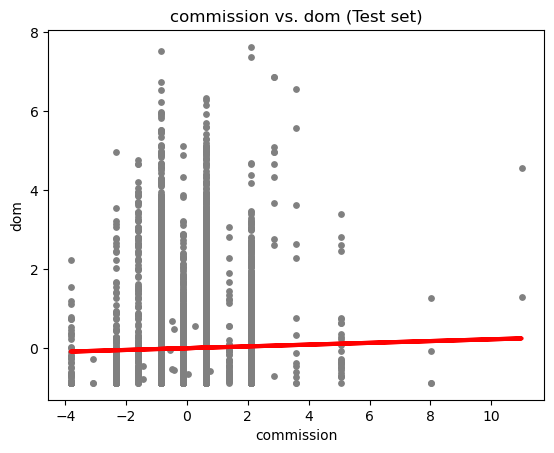

In [83]:
# Create a plot that shows the regression line from the model on the test set.

plot_3 = plt
plot_3.scatter(X3_test, y3_test, color='gray', s = 15)
plot_3.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_3.title('commission vs. dom (Test set)')
plot_3.xlabel('commission')
plot_3.ylabel('dom')
plot_3.show()

OBSERVATION

The regression line appears to have a slight positive slope. This is unexpected 

Check the model performance statistics—MSE and R2 score.

In [84]:
# Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y3_test, y3_predicted) # Mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # R2 score. 

In [85]:
# Print the model summary statistics (evaluate the performance of the model).

print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Mean squared error:  0.9926281936001388
R2 score:  0.00018746142350423156


OBSERVATION
- It would appear that there is no linear relationship between 'commission' and 'dom'